<a href="https://colab.research.google.com/github/geethikaprasad13/AIML_Projects_and_Lab/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px

In [47]:
def toss_coin(number_of_tosses=20):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=10):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [49]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    11
Heads     9
Name: count, dtype: int64


In [50]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [51]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [52]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [53]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

12 cards were thrown: 2C 7H KH 8C 5H 4H 6D QD KS 10H KC 5S AS
15 cards were thrown: 3C 10S 5D 8C 7C KC 4H 2D 5H JH 7D 2C 2S 4S 3D AH
29 cards were thrown: JD 5H QD 4H KD JS 8S 10D 5C 7D 8C 3H 3C 7C KH 9C QH KS 7H 8D 2D JH QC 4S 6H 10S 4C 2S 9S AS
3 cards were thrown: 7C 2S 8D AC
2 cards were thrown: 9S 9D AS
0 cards were thrown: AH
2 cards were thrown: 8C 9H AH
0 cards were thrown: AH
0 cards were thrown: AS
9 cards were thrown: 6C 3D 6H 8S QD 8D 5H 8C 10S AD

9.7112 cards are tossed before we see the first ace!


In [54]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

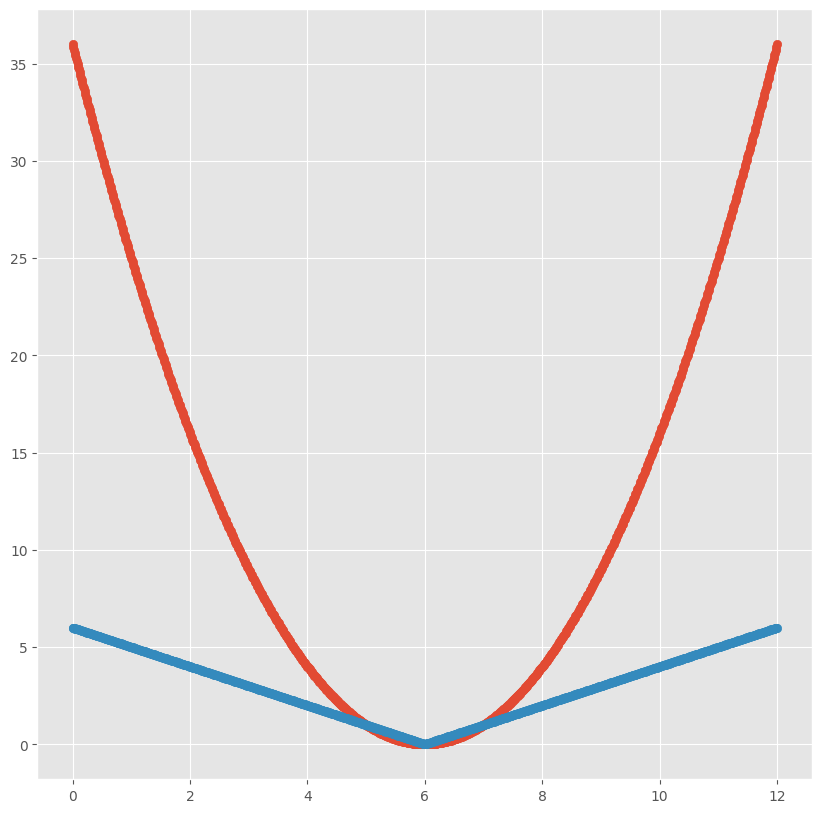

In [55]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [56]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.select_dtypes(include='number').agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


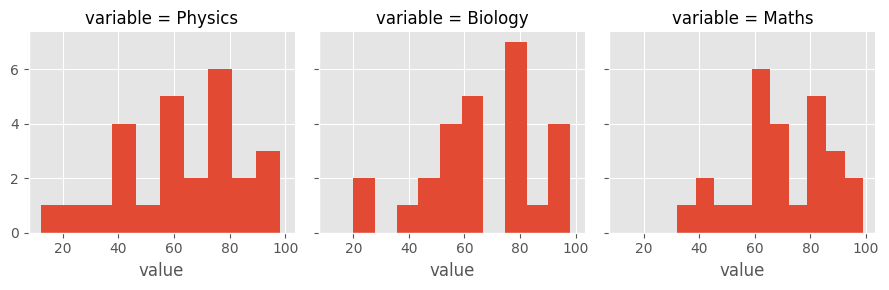

In [57]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [58]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [59]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [60]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [61]:
from scipy.stats import binom

In [62]:
binom.pmf(k=5, n=5, p=0.25)

np.float64(0.0009765625)

In [63]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

np.float64(0.3671875)

In [64]:
binom.cdf(3, n=5, p=0.75)

np.float64(0.3671875)

In [65]:
from scipy.stats import norm

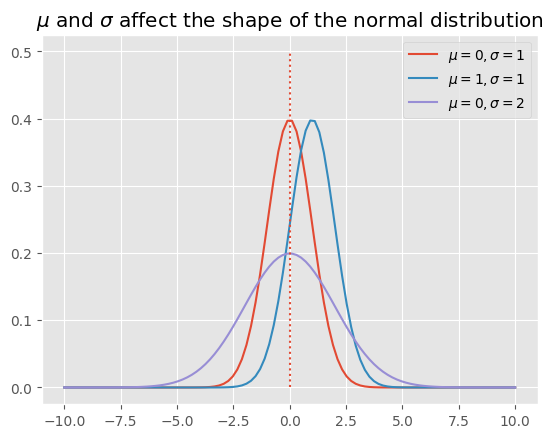

In [66]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [67]:
norm.cdf(0)

np.float64(0.5)

In [68]:
norm.ppf(0.5)

np.float64(0.0)

In [69]:
norm.ppf(0.84, loc=169.57, scale=7.57)

np.float64(177.09804617589782)

In [70]:
169.57 + 7.57

177.14

In [71]:
norm.ppf(0.975, loc=169.57, scale=7.57)

np.float64(184.4069273629682)

In [72]:
169.57 + 2 * 7.57

184.70999999999998

In [73]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

np.float64(147.10422390516268)

In [74]:
169.57 - 3 * 7.57

146.85999999999999

In [75]:
from scipy.stats import poisson

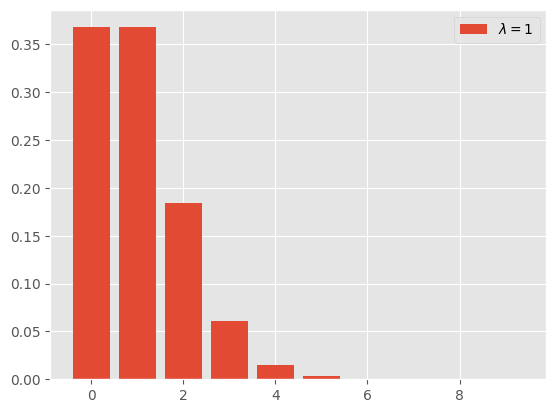

In [76]:
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [78]:
x @ f1

np.float64(0.999998874797402)

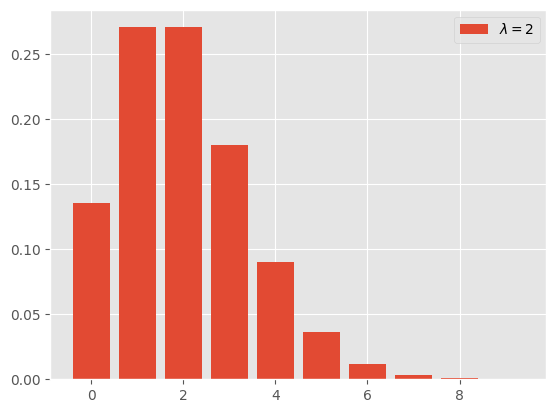

In [79]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [80]:
x @ f2

np.float64(1.999525105343477)

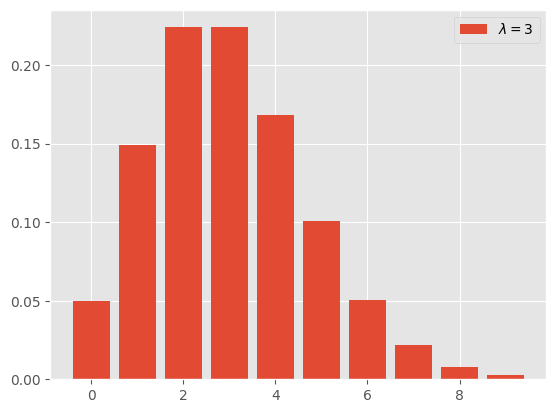

In [81]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [82]:
x @ f3

np.float64(2.9885910238149727)

In [83]:
poisson.pmf(3, 5)

np.float64(0.1403738958142805)

In [84]:
from scipy.stats import poisson

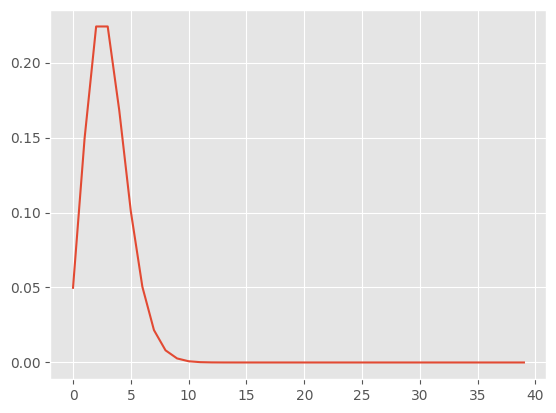

In [85]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([14., 26., 77., 74., 92., 51., 40., 16.,  7.,  3.]),
 array([2.05 , 2.275, 2.5  , 2.725, 2.95 , 3.175, 3.4  , 3.625, 3.85 ,
        4.075, 4.3  ]),
 <BarContainer object of 10 artists>)

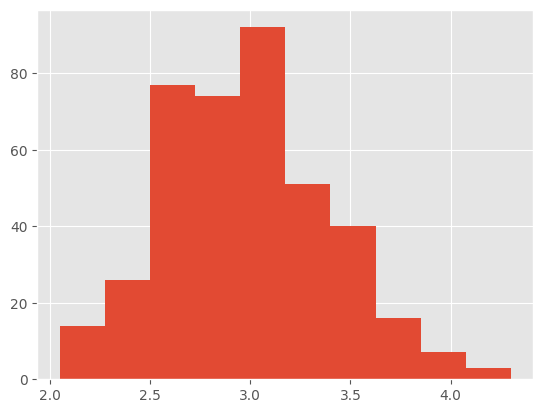

In [86]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

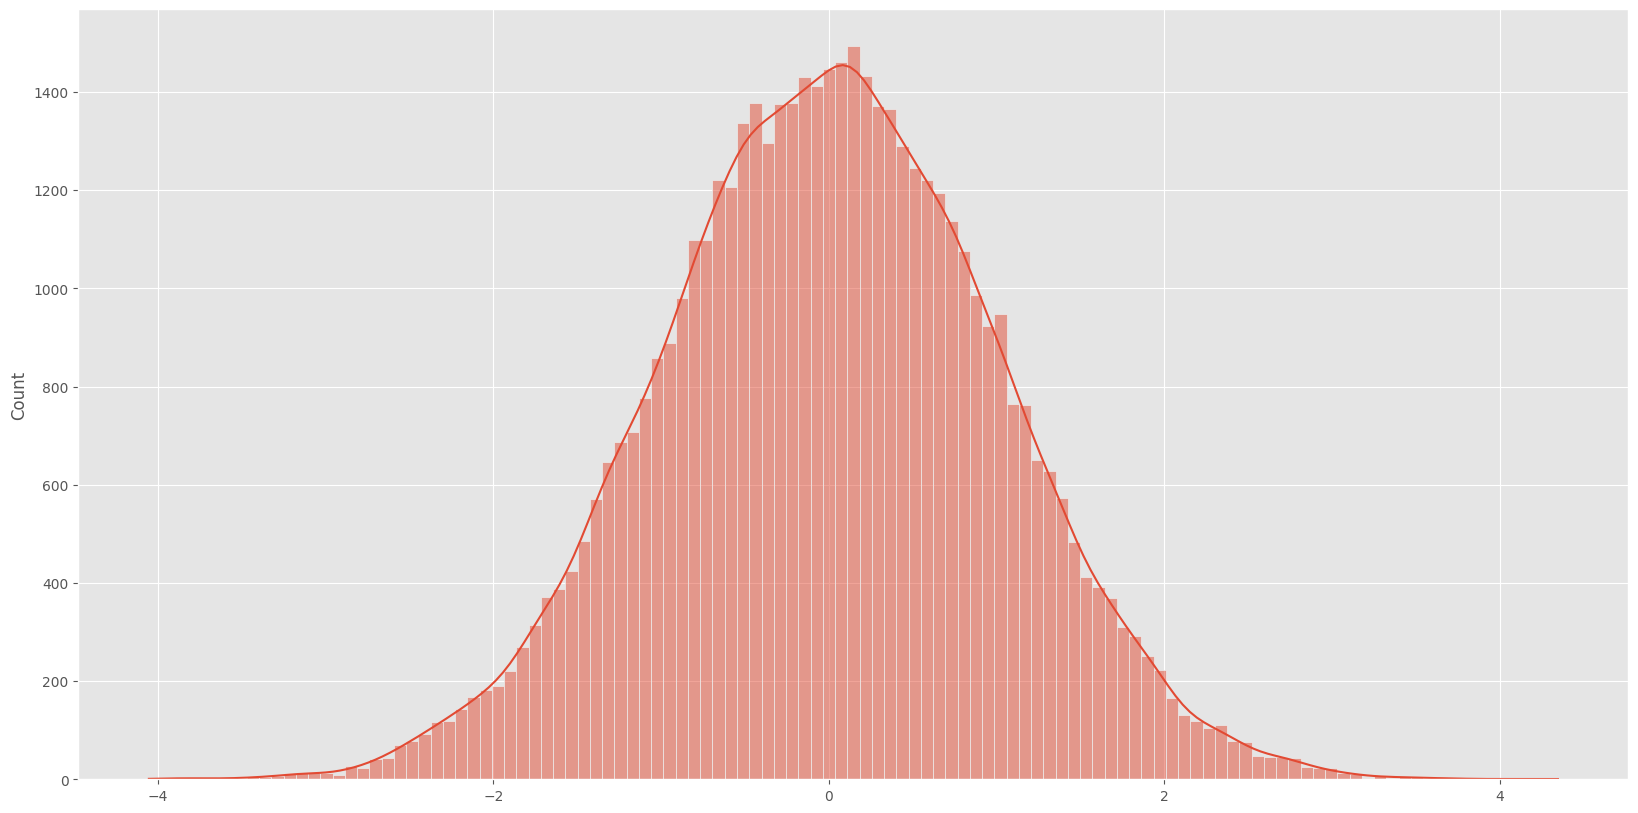

In [87]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

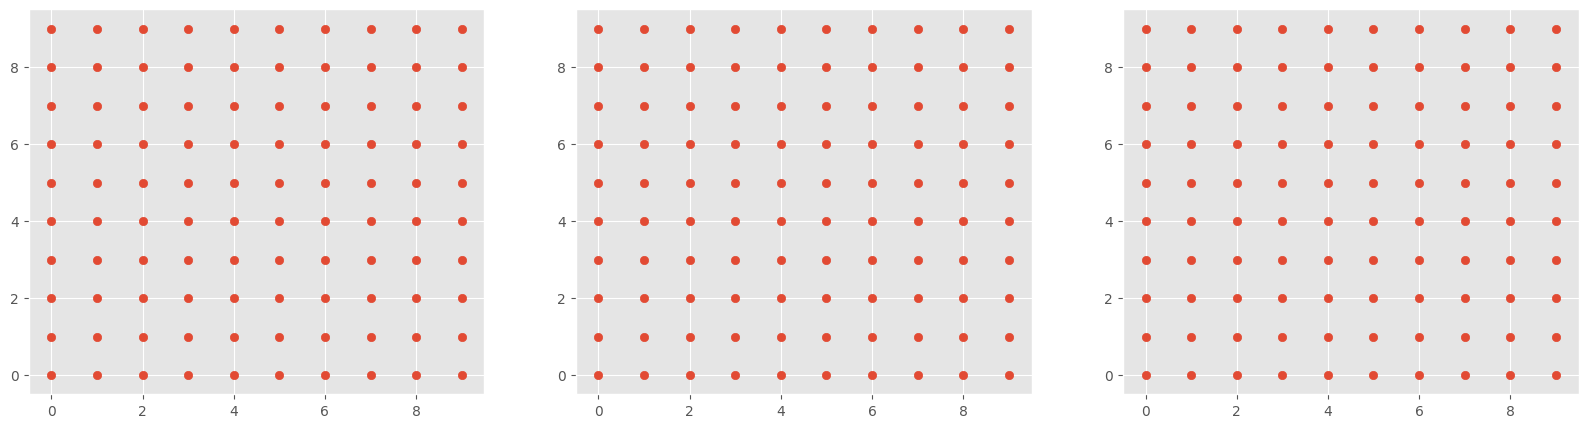

In [88]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

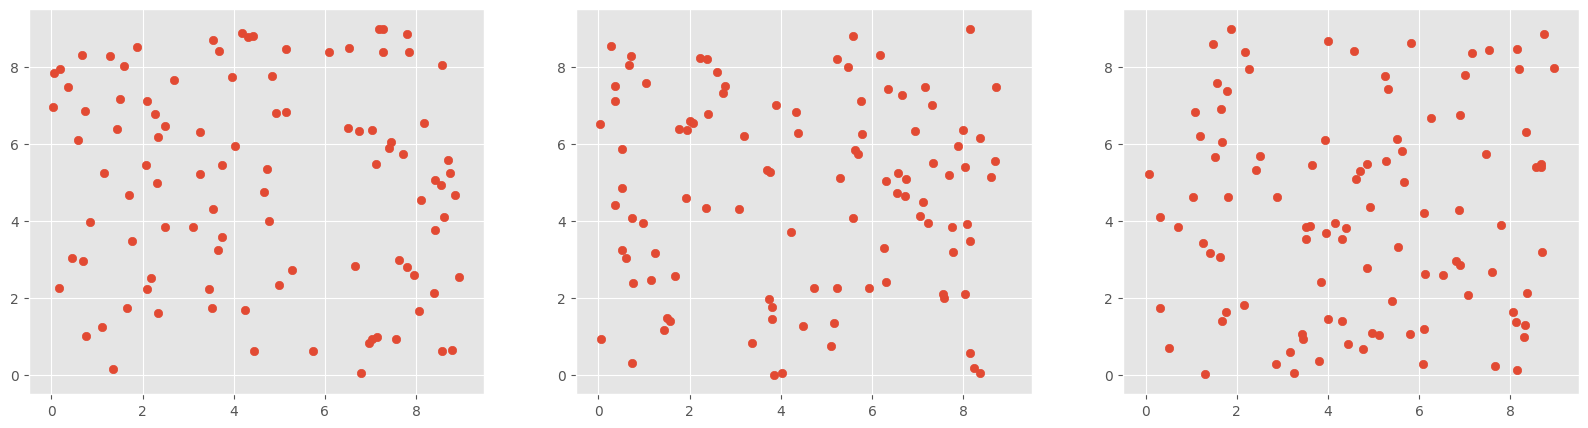

In [89]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

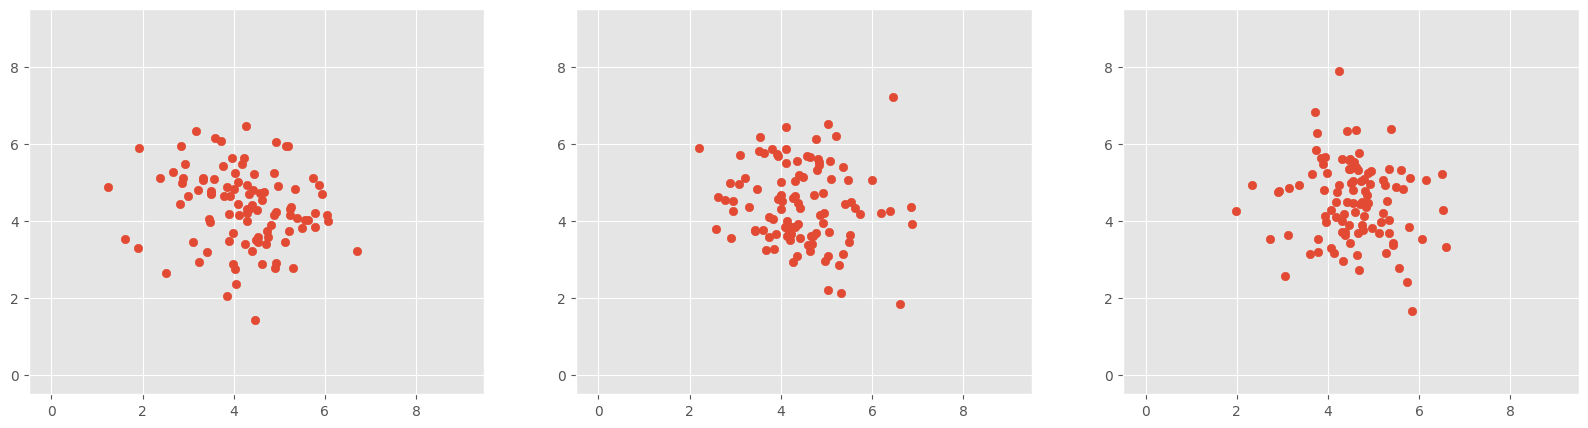

In [90]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()